# _Dataviz Code Session_: Distribuições

## Objetivos da DCS

- Aplicar técnicas de dataviz para plotagem e manipulação de representações visuais de distribuições.
- Elaborar RVs para dados de censo (Fonte: [UCI ML Repository](https://archive.ics.uci.edu/dataset/2/adult))
    - CSV disponível no [kaggle](https://www.kaggle.com/code/aditimulye/adult-income-dataset-from-scratch).

## Ferramentas utilizadas

- Módulos Python
    - `pandas`
    - `matplotlib`
    - `seaborn`

## Aplicação do modelo referencial

- Vide {numref}`Capítulo %s <cap:estetica>`.

In [27]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

plt.style.use('../etc/gcpeixoto-datavis.mplstyle') # style sheet

### Dados de entrada pré-processados

- Carregamento de dados

In [28]:
df = pd.read_csv('../data/adults.csv',skiprows=1)
df

,age,type-employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Visualização de distribuições univariadas

- Podemos usar `seaborn.displot` para plotagens gerais de distribuições:
    - `kind` = `hist | kde | ecdf` plotará histograma, ou _kernel density estimation_, ou ECDF
    - `row` e `col` expandem plots
    - A inclusão de `y` e `hue` gerará RVs similares a mapas de calor ou, proporções, quando _hue_ for categórico.

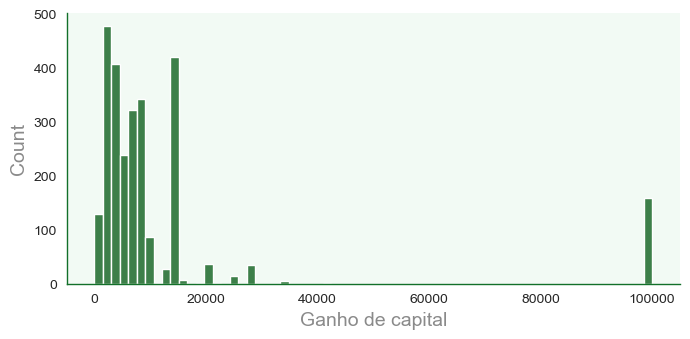

In [29]:
dfa = df[df['capital_gain'] > 0]

# f é figure level
f = sb.displot(data=dfa,
           x='capital_gain',
           color='#005610', 
           edgecolor='w', 
           linewidth=1,
           kind='hist', # hist | kde | ecdf
           #row='race', # faz outros plots por linha
           #col='sex', # faz outros plots por colu
           #stat='density', # count | frequency | density | probability | percent | proportion           
           height=3.5, aspect=2 # aspecto usa proporção de altura
           )

# remover grid
for ax in f.axes.flat:
    ax.grid(False)
    ax.set_xlabel('Ganho de capital')

### KDE e superposição

- Com `kdeplot`, temos a curva estimada por núcleos, a qual pode ser superposta ao histograma por meio de `ax`.

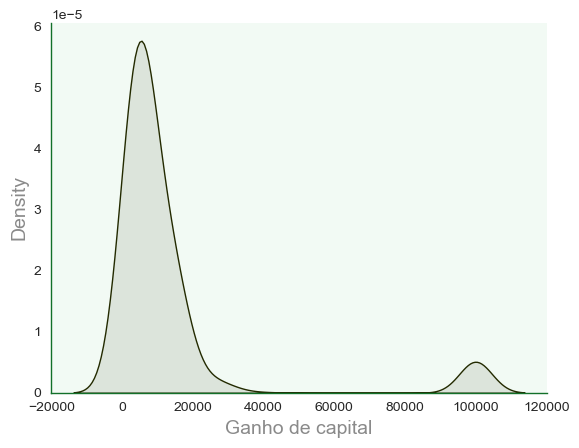

In [30]:
f2 = sb.kdeplot(data=dfa,
           x='capital_gain',
           color='#232a00',
           fill=True,
           alpha=0.1,
           #ax=f.ax # habilite para sobrepor
           )

f2.grid(False)
f2.set_xlabel('Ganho de capital');
    


### Distribuição cumulativa

- Distribuições cumulativas empíricas podem ser plotadas com `ecdfplot`.

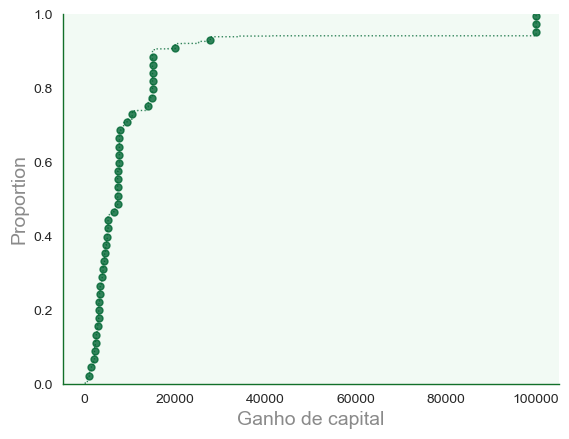

In [31]:
f2a = sb.ecdfplot(data=dfa,
           x='capital_gain',
           color='#006633',
           alpha=0.8,
           linewidth=1.0,
           ls=':',
           marker='o',
           markersize=5,
           markevery=60
           #ax=f.ax # habilite para sobrepor
           )

f2a.grid(False)
f2a.set_xlabel('Ganho de capital');

### Plot tapete (ou borla)

- O `rugplot` é uma representação visual que adiciona traços similares a ticks no gráfico. O nome  "rug" (tapete) deriva da lembrança de um tapete aberto com suas borlas (franjas) destacadas.
    - Também podemos construir _rugs_ com a keyword `rug` em `displot`.

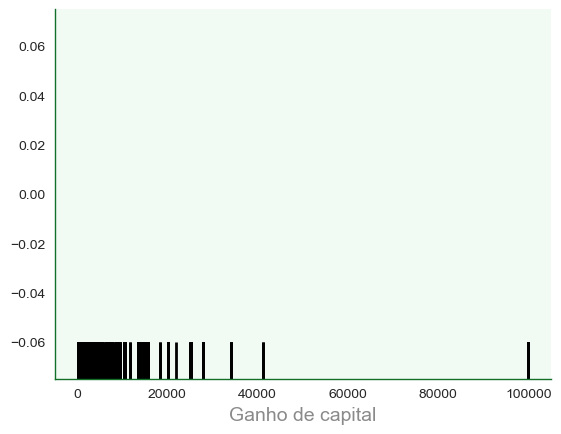

In [32]:
f3 = sb.rugplot(data=dfa,
           x='capital_gain',
           color='k',
           linewidth=2,
           height= 0.1, 
           )

f3.grid(False)
f3.set_xlabel('Ganho de capital');

#### Superposição de borlas

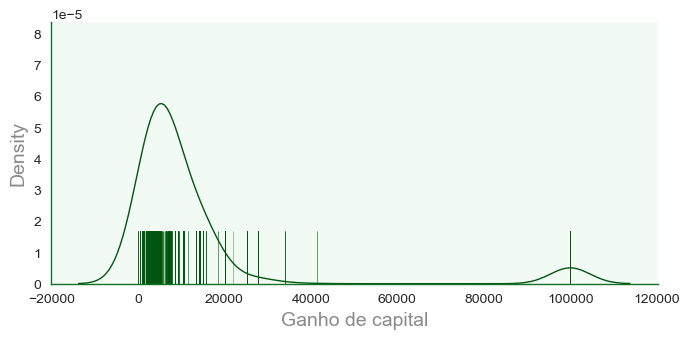

In [33]:
f4 = sb.displot(data=dfa,
           x='capital_gain',
           color='#005610', 
           linewidth=1,
           kind='kde',           
           height=3.5, 
           aspect=2,
           rug=True,
           rug_kws={
               'height': 0.2,
               'color': 'w',
               'linewidth': 0.5,
               'alpha': 0.5,
           }
           )

for ax in f4.axes.flat:
    ax.grid(False)
    ax.set_xlabel('Ganho de capital')

### Outros visuais

- Mapa com displot

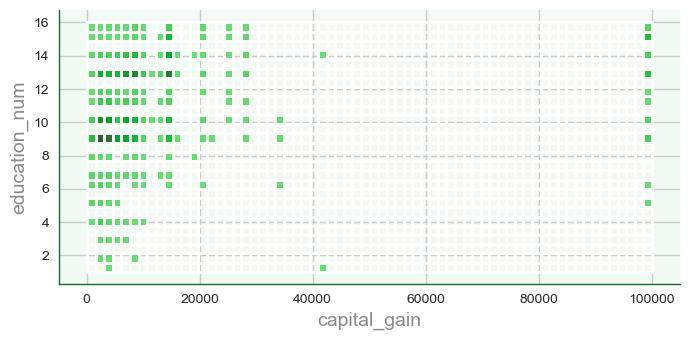

In [34]:
f5 = sb.displot(data=dfa,
           x='capital_gain',
           y='education_num',
           color='#005610', 
           edgecolor='w', 
           linewidth=1,
           height=3.5, aspect=2 # aspecto usa proporção de altura
           )

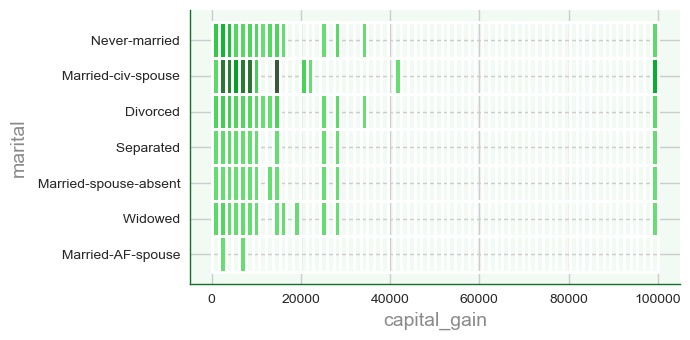

In [35]:
f6 = sb.displot(data=dfa,
           x='capital_gain',
           y='marital',
           color='#005610', 
           edgecolor='w', 
           linewidth=1,
           height=3.5, aspect=2 # aspecto usa proporção de altura
           )


## Distribuições bivariadas

- Usamos `jointplot` para exibir densidades a partir de relações entre duas variáveis.
    - Controle o tipo com `kind` e o `hue`

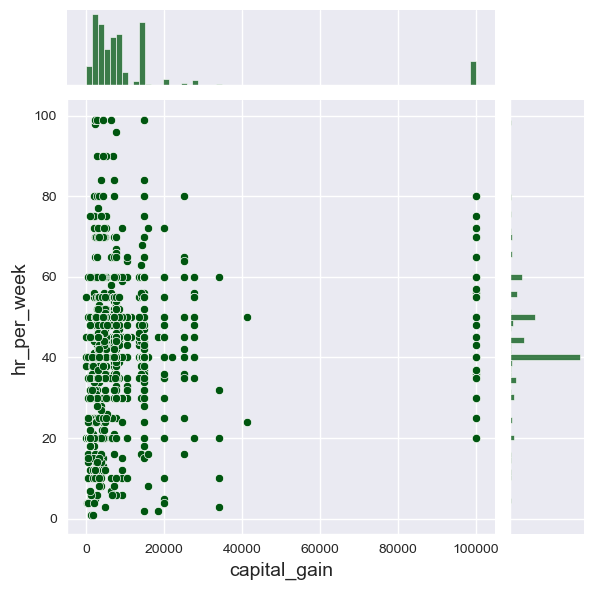

In [36]:
sb.set_style('darkgrid')
f7 = sb.jointplot(data=dfa,
           x='capital_gain',
           y='hr_per_week',
           color='#005610',
           height=6,     
           #hue='sex'
           kind='scatter' # 'scatter', 'hist', 'hex', 'kde', 'reg', 'resid']
           )



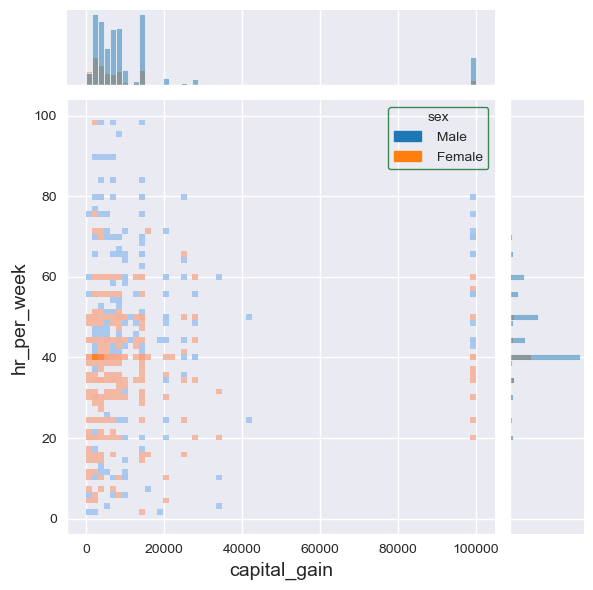

In [37]:
sb.set_style('darkgrid')
f7a = sb.jointplot(data=dfa,
           x='capital_gain',
           y='hr_per_week',
           color='#005610',
           height=6,     
           hue='sex',
           kind='hist' # 'scatter', 'hist', 'hex', 'kde', 'reg', 'resid']
           )



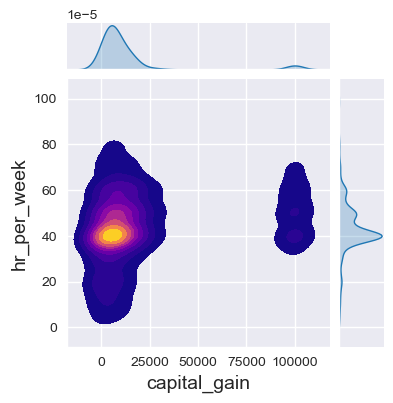

In [38]:
f7c = sb.jointplot(data=dfa,
           x='capital_gain',
           y='hr_per_week',
           height=4,     
           kind='kde', # 'scatter', 'hist', 'hex', 'kde', 'reg', 'resid'],
           fill=True,
           cmap='plasma'
           )


- Usamos `pairplot` para realizar plotagens de pareamentos em forma matricial

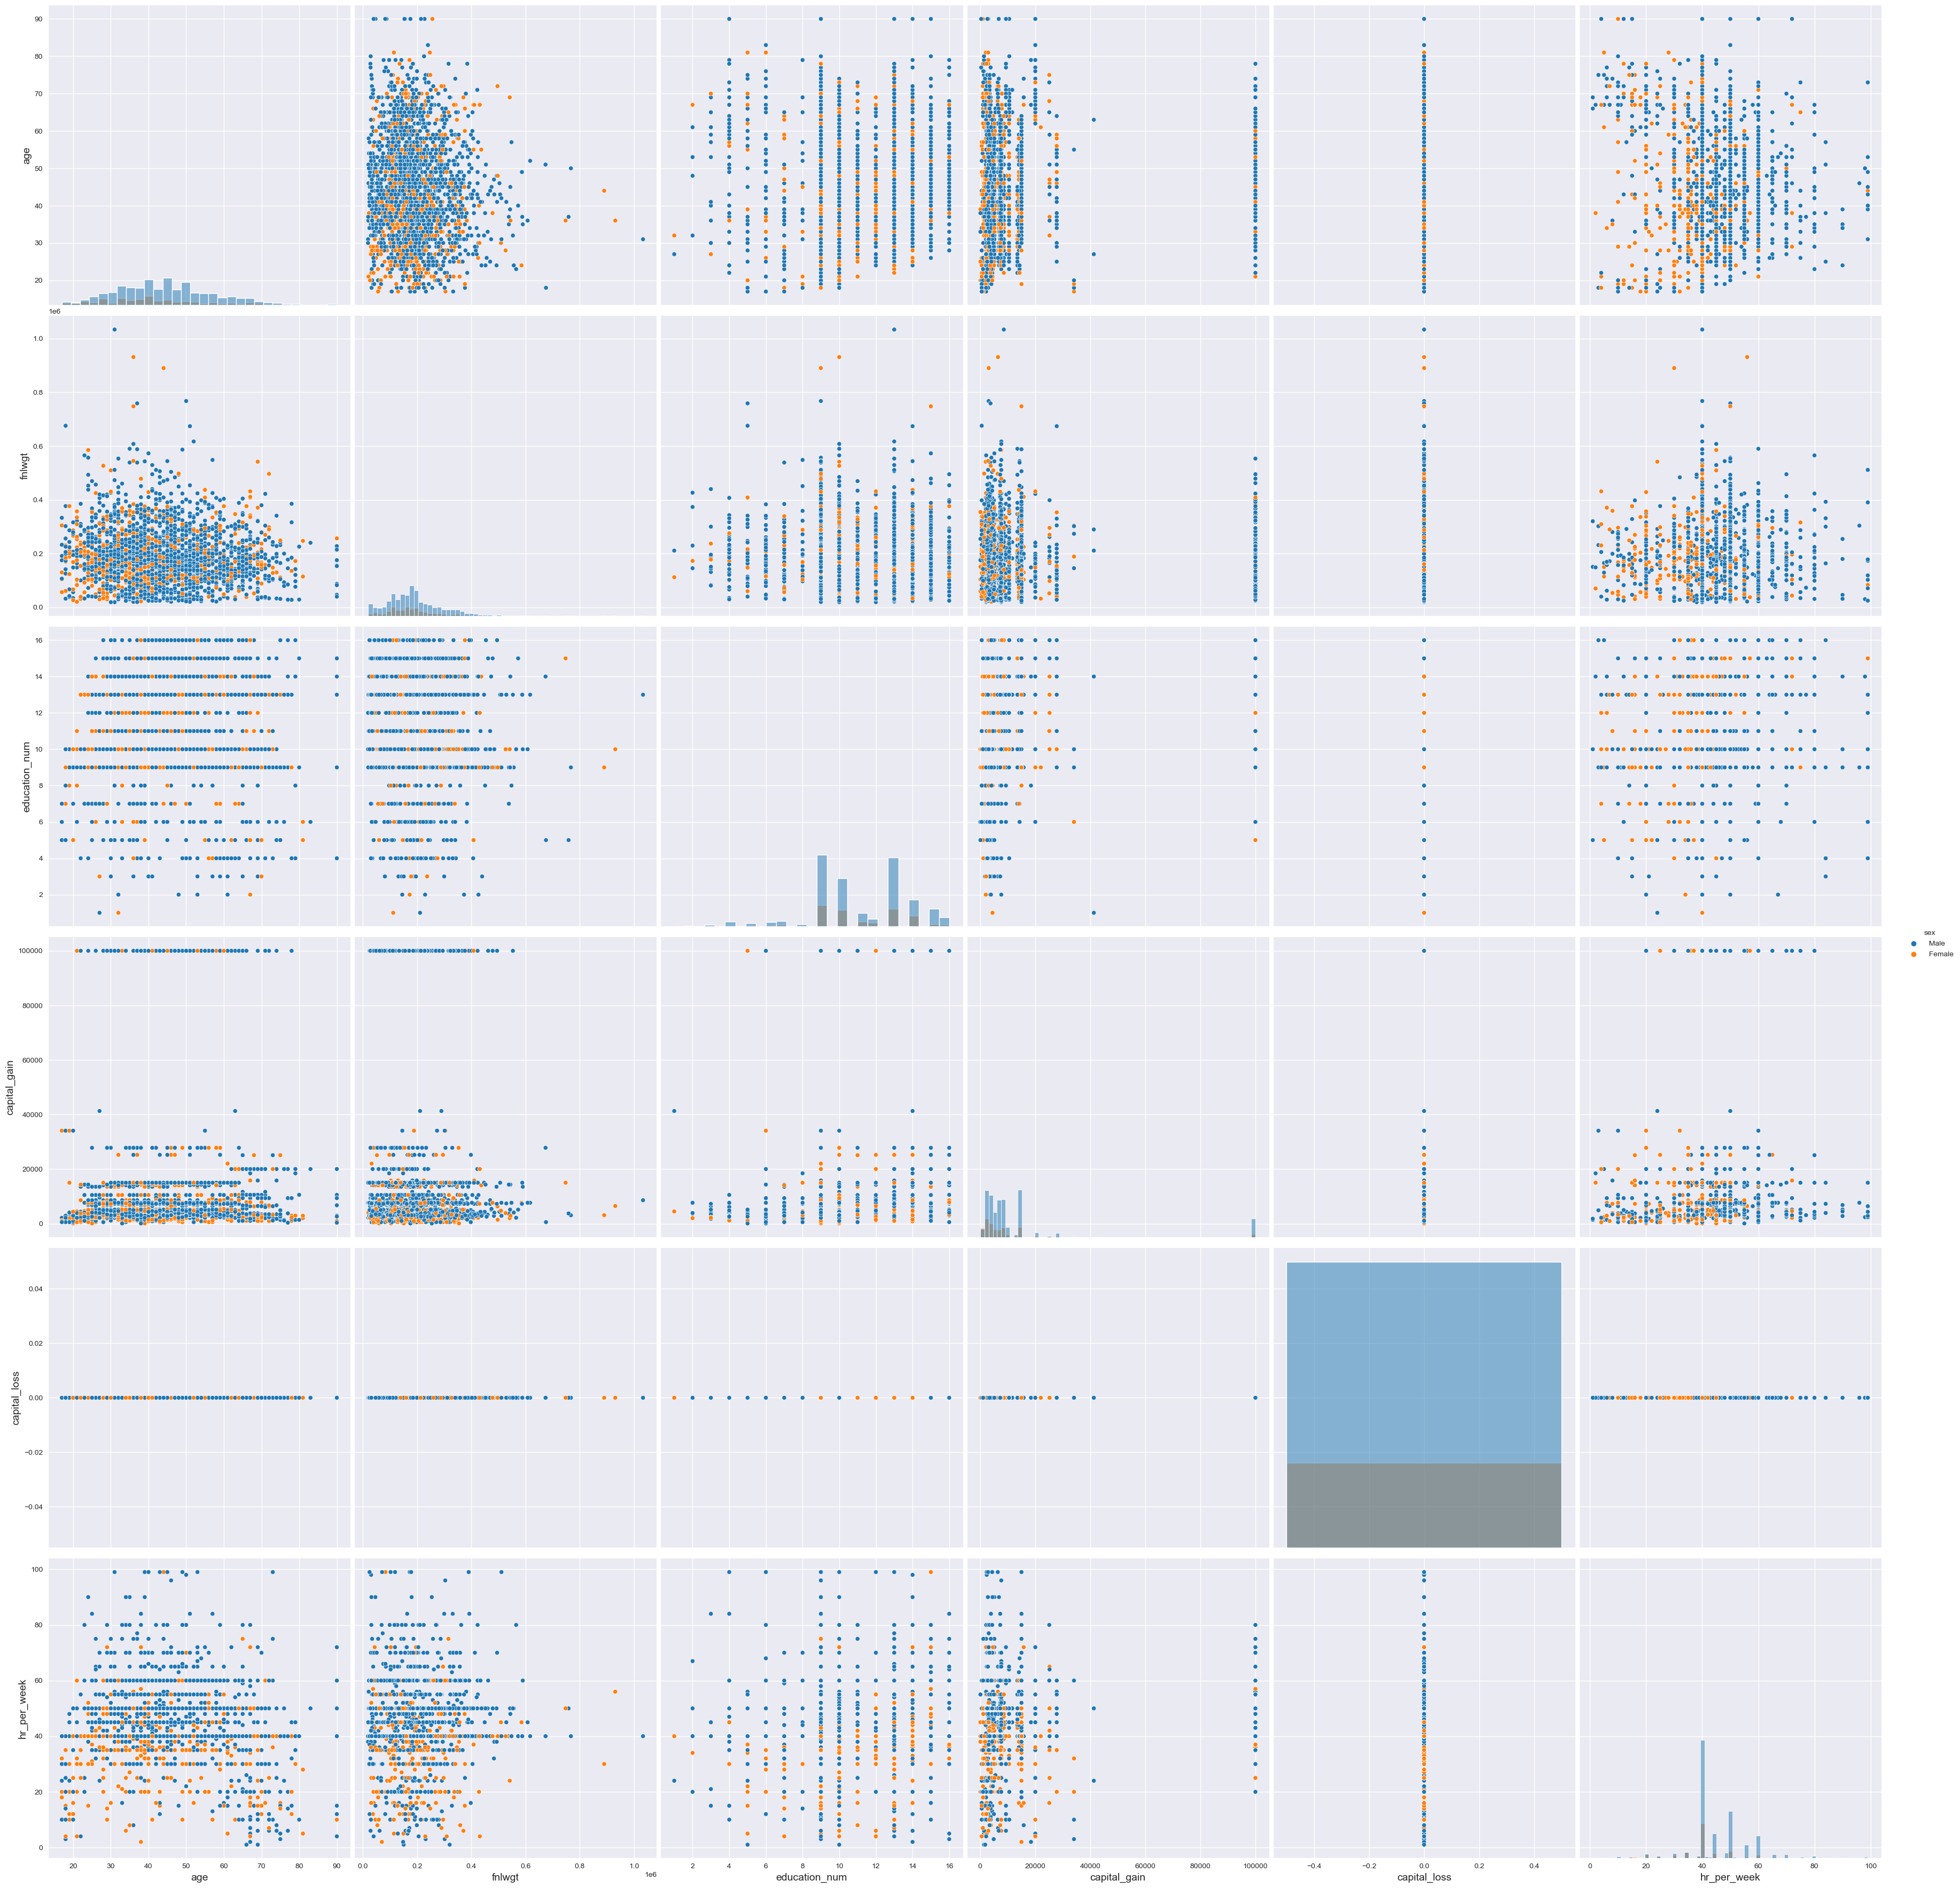

In [39]:
f7d = sb.pairplot(data=dfa,
           height=6,     
           hue='sex',
           #kind='scatter' # 'scatter', 'hist', 'hex', 'kde', 'reg', 'resid'],
           diag_kind='hist'
           )

